In [1]:
# chi 2 and square root - to see the distribution parameters..

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
%matplotlib widget

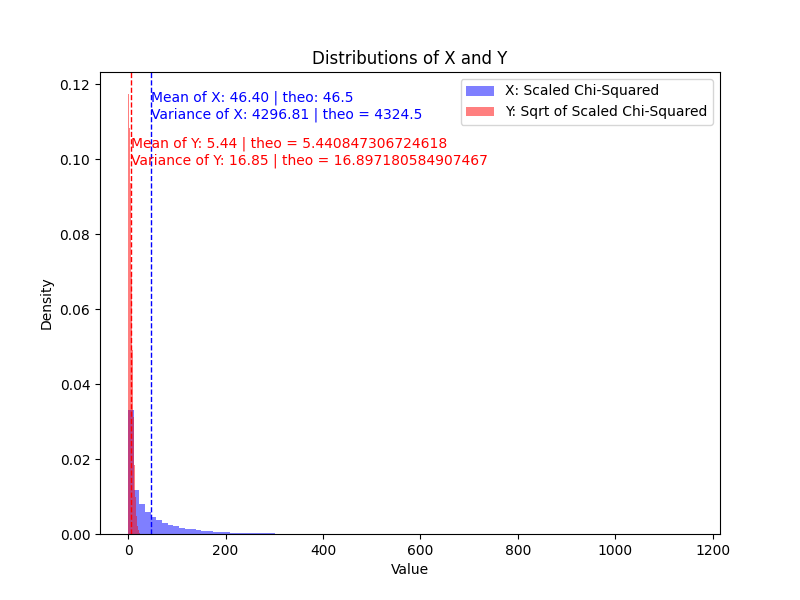

In [4]:
# Parameters to sample.
N_samples = 1000000
DOF = 1
avg_reduced_width_square = 46.5  # from Cole & ATARI for Ta-181

# Scale factor
scale_factor = avg_reduced_width_square / DOF

# theoretical mean and variance for chi2
# Mean of X = DOF×s
# Variance of X = 2×DOF×s^2

mean_X_theo = scale_factor * DOF 
variance_X_theo = 2 * DOF * scale_factor**2

# half of normal distribution ?
mean_Y_theo = np.sqrt(scale_factor) * np.sqrt(2 / np.pi)
variance_Y_theo = scale_factor * (1 - 2 / np.pi)



# Generate X
X_samples = np.random.chisquare(DOF, size=N_samples) * scale_factor

# Transform to Y = sqrt(X)
Y_samples = np.sqrt(X_samples)

# Calculate empirical mean and variance for both X and Y
mean_X = np.mean(X_samples)
variance_X = np.var(X_samples)
mean_Y = np.mean(Y_samples)
variance_Y = np.var(Y_samples)

# Plotting
plt.figure(figsize=(8, 6))
plt.hist(X_samples, bins=100, density=True, alpha=0.5, color='blue', label='X: Scaled Chi-Squared')
plt.hist(Y_samples, bins=100, density=True, alpha=0.5, color='red', label='Y: Sqrt of Scaled Chi-Squared')

# Add mean and variance annotations
plt.axvline(mean_X, color='blue', linestyle='dashed', linewidth=1)
plt.text(mean_X, plt.ylim()[1]*0.9, f'Mean of X: {mean_X:.2f} | theo: {mean_X_theo}\nVariance of X: {variance_X:.2f} | theo = {variance_X_theo}', color='blue')
plt.axvline(mean_Y, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_Y, plt.ylim()[1]*0.8, f'Mean of Y: {mean_Y:.2f} | theo = {mean_Y_theo} \nVariance of Y: {variance_Y:.2f} | theo = {variance_Y_theo}', color='red')

# Final plot formatting
plt.title("Distributions of X and Y")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.show()

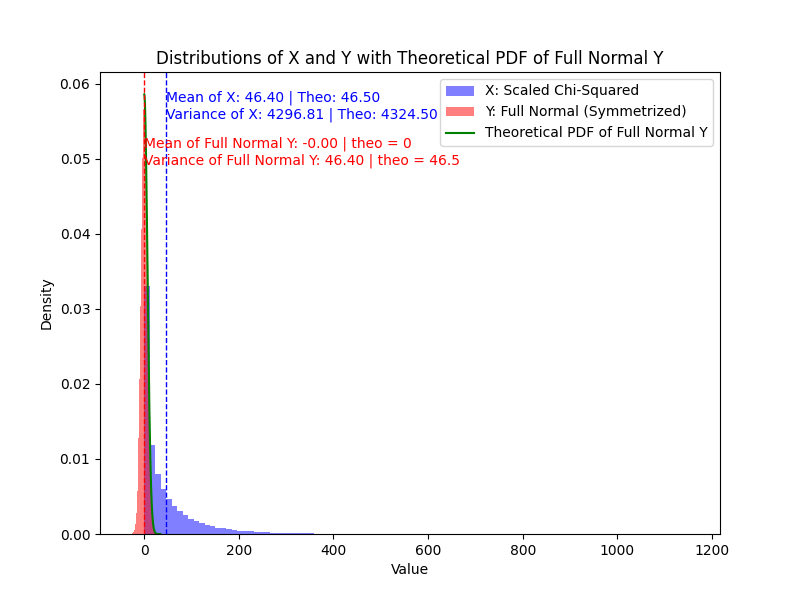

In [5]:
# Symmetrize Y_samples to create a full normal distribution

Y_samples_full_normal = np.concatenate([Y_samples, -Y_samples])

# Recalculate empirical mean and variance for the full normal distribution of Y
mean_Y_full_normal = np.mean(Y_samples_full_normal)
variance_Y_full_normal = np.var(Y_samples_full_normal)
std_dev_Y_full_normal = np.sqrt(variance_Y_full_normal)


# Prepare values for plotting theoretical PDF of the full normal Y
Y_values_full_normal = np.linspace(0, max(Y_samples_full_normal), 1000)
pdf_Y_full_normal_theo = norm.pdf(Y_values_full_normal, mean_Y_full_normal, std_dev_Y_full_normal)

variance_Y_full_normal_theo = scale_factor
mean_Y_full_normal_theo = 0

# Plotting with empirical data for the full normal distribution of Y
plt.figure(figsize=(8, 6))
plt.hist(X_samples, bins=100, density=True, alpha=0.5, color='blue', label='X: Scaled Chi-Squared')
plt.hist(Y_samples_full_normal, bins=100, density=True, alpha=0.5, color='red', label='Y: Full Normal (Symmetrized)')
plt.plot(Y_values_full_normal, pdf_Y_full_normal_theo, color='green', label='Theoretical PDF of Full Normal Y')

# Add mean and variance annotations for X and Y
plt.axvline(mean_X, color='blue', linestyle='dashed', linewidth=1)
plt.text(mean_X, plt.ylim()[1]*0.9, f'Mean of X: {mean_X:.2f} | Theo: {mean_X_theo:.2f}\nVariance of X: {variance_X:.2f} | Theo: {variance_X_theo:.2f}', color='blue')
plt.axvline(mean_Y_full_normal, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_Y_full_normal, plt.ylim()[1]*0.8, f'Mean of Full Normal Y: {mean_Y_full_normal:.2f} | theo = {mean_Y_full_normal_theo } \nVariance of Full Normal Y: {variance_Y_full_normal:.2f} | theo = {variance_Y_full_normal_theo}', color='red')

# Final plot formatting
plt.title("Distributions of X and Y with Theoretical PDF of Full Normal Y")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.show()

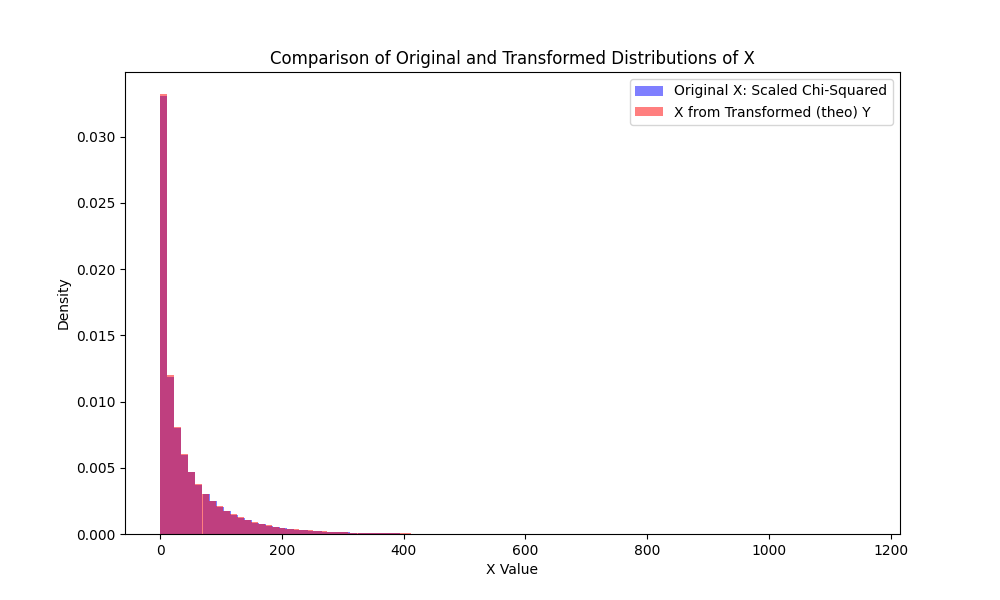

In [6]:
# sampling from full normal

# Sample from the full normal distribution to generate Y values
theo_Y_samples_from_full_normal = np.random.normal(mean_Y_full_normal_theo, 
                                              np.sqrt(variance_Y_full_normal_theo), 
                                              N_samples)

# Transform Y samples back to X (since Y = sqrt(X), X = Y^2)
X_samples_from_Y = theo_Y_samples_from_full_normal**2


# Plotting for comparison
plt.figure(figsize=(10, 6))

# Original distribution of X
plt.hist(X_samples, bins=100, density=True, alpha=0.5, color='blue', label='Original X: Scaled Chi-Squared')

# Transformed distribution of X from Y
plt.hist(X_samples_from_Y, bins=100, density=True, alpha=0.5, color='red', label='X from Transformed (theo) Y')

# Plot formatting
plt.title("Comparison of Original and Transformed Distributions of X")
plt.xlabel("X Value")
plt.ylabel("Density")
plt.legend()

***Likellihood calculation of the Y value (gamma)***

Suppose we have distribution parameters for the gamma.

In [7]:
def norm_log_likelihood(y_hat, mean_Y, std_dev_Y):
    """
    Calculate the negative log likelihood for given values from a normal distribution.

    Parameters:
    y_hats (array-like): The observed values for which to calculate the likelihood.
    mean_Y (float): The mean of the normal distribution.
    std_dev_Y (float): The standard deviation of the normal distribution.

    Returns:
    float: The negative log likelihood.
    """
    # Calculate the likelihood for each y_hat
    likelihoods = norm.pdf(y_hat, mean_Y, std_dev_Y)

    # Calculate the log likelihoods (add a small constant to prevent log(0))
    epsilon = 1e-323
    NLL = - np.log(likelihoods + epsilon)
        
    return likelihoods, NLL

# usage
y_hat = np.array([0, np.sqrt(avg_reduced_width_square), 15, -np.sqrt(avg_reduced_width_square)]) 
mean_Y = mean_Y_full_normal_theo  
std_dev_Y = np.sqrt(variance_Y_full_normal_theo) 

# Calculate the negative log likelihood (for full normal)
likelihoods, NLL = norm_log_likelihood(y_hat, mean_Y, std_dev_Y)
print('Values', y_hat)
print('Likellihood: ', likelihoods)
print("Negative Log Likelihood:", NLL)

# now add likellihood func fot the chi2 for x, taken into account given DOF, and avg_value

Values [ 0.          6.81909085 15.         -6.81909085]
Likellihood:  [0.05850373 0.03548431 0.0052056  0.03548431]
Negative Log Likelihood: [2.83866469 3.33866469 5.25801953 3.33866469]


In [8]:
# now vary all the X from 0 to some threshold 100 * avg... and calc likellihood of having such a value
# # DOF = 1
# avg_reduced_width_square = 46.5  # from Cole & ATARI for Ta-181

# # Scale factor
# scale_factor = avg_reduced_width_square / DOF

# # theoretical mean and variance for chi2
# # Mean of X = DOF×s
# # Variance of X = 2×DOF×s^2

# mean_X_theo = scale_factor * DOF 
# variance_X_theo = 2 * DOF * scale_factor**2

# at the same time - calc Y and calculate likellihood of calculated value with assumption



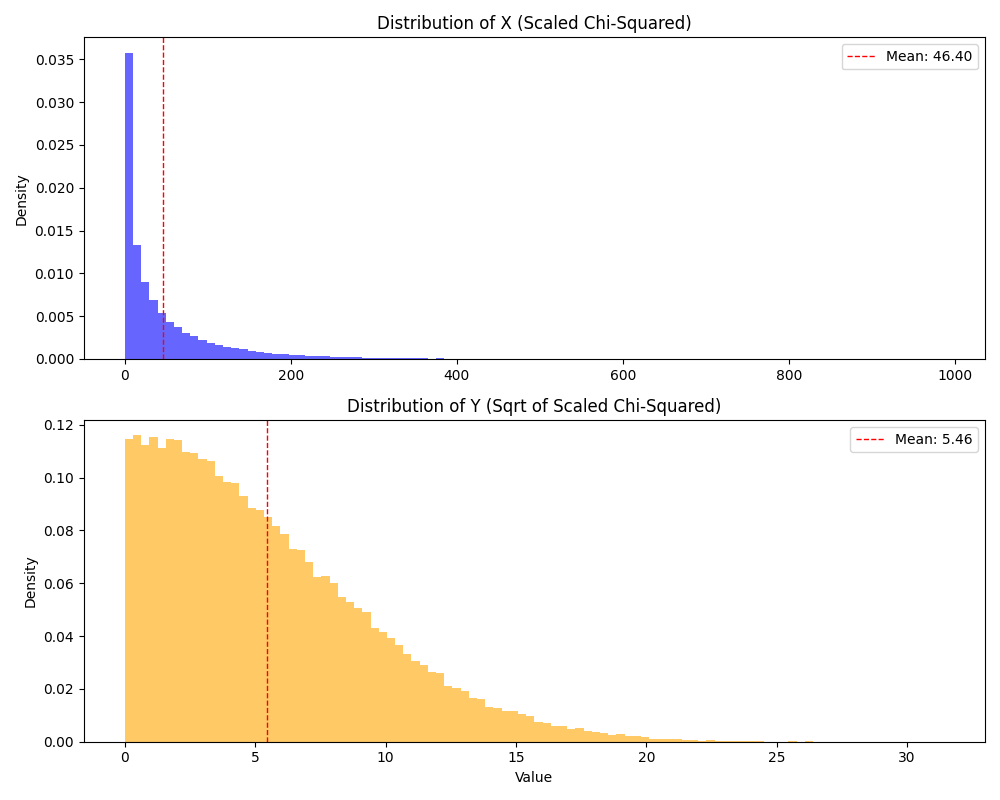

In [9]:
# Correcting the approach to apply the scale factor separately to the chi-squared samples

# Sampling X from a chi-squared distribution with DOF=1
X_samples_unscaled = np.random.chisquare(df=DOF, size=100000)

# Applying the scale factor to X samples
X_samples = X_samples_unscaled * scale_factor

# Calculating Y as the square root of X
Y_samples = np.sqrt(X_samples)

mean_Y = np.mean(Y_samples)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot for X
axs[0].hist(X_samples, bins=100, density=True, color='blue', alpha=0.6)
axs[0].axvline(mean_X, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_X:.2f}')
axs[0].set_title('Distribution of X (Scaled Chi-Squared)')
axs[0].set_ylabel('Density')
axs[0].legend()

# Plot for Y
axs[1].hist(Y_samples, bins=100, density=True, color='orange', alpha=0.6)
axs[1].axvline(mean_Y, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_Y:.2f}')
axs[1].set_title('Distribution of Y (Sqrt of Scaled Chi-Squared)')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Density')
axs[1].legend()

plt.tight_layout()
plt.show()

